
### 商业模式

1. B2B：商家对商家（企业卖家对企业买家），交易双方都是企业，最典型的案例就是阿里巴巴，汇聚了各行业的供应商，特点是订单量一般较大。
2. B2C：商家对个人（企业卖家对个人买家），例如：唯品会，聚美优品。
3. B2B2C：商家对商家对个人，例如：天猫、京东。
4. C2C：个人（卖家）对个人（买家），例如：淘宝、人人车。
5. O2O：线上（售卖）到线下（提货），将线下的商务机会与互联网结合，让互联网成为线下交易的平台，让消费者在享受线上优惠价格的同时，又可享受线下贴心的服务，例如：美团、苏宁易购、大众点评。
6. C2B：个人对商家（个人买家对企业卖家），先有消费者提出需求，后有商家按需求组织生产，例如：尚品宅配。
7. 其他：ABC（代理-商家-消费者）、F2C（工厂-个人）、B2G（政府采购）、BoB（供应商-运营者-采购商）、SoLoMo（社交-本地化-移动端）……。


电商网站核心指标：

1. 复购率和回购率

    - 复购率：复购（某段时间有2次及以上购买行为）用户的占比。复购率能反映用户的忠诚度，监测周期一般较长。
    - 回购率：回购率一般监测周期较短，可以反映如短期促销活动对用户的吸引力。

2. 用户交易常用指标

    - 访问次数（PV）：一定时间内某个页面的浏览次数。
    - 访问人数（UV）：一定时间内访问某个页面的人数。
    - 加购数：将某款商品加入到购物车的用户数。
    - 收藏数：收藏某款商品的用户数。
    - GMV（总交易额、成交总额）：Gross Merchandise Volume，通常称之为“交易流水”。
    - 客单价（ARPU）：“$ 总收入 / 总用户数 $”，某些平台也用ARPPU表示客单价。
    - 转化率：“$ 付费用户数 / 访客数 $”。
    - 折扣率：“$ 销售额 / 吊牌总额 $”，其中吊牌总额为：“$ 吊牌价 \times 销量 $”。
    - 拒退量：拒收和退货的总数量。
    - 拒退额：拒收和退货的总金额。
    - 实际销售额：“$ 销售额 - 拒退额 $”。

3. 商品管理常用指标

    - `SPU数：Standard Product Unit，商品的基本信息。`
    - `SKU数：Standard Keeping Unit，商品的库存信息。`
    - 售卖比：“$ GMV / 备货值 $”，了解商品流转情况，可以用于库存优化。
    - 动销率：“$ 有销量的SKU数 / 在售SKU数 $”。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('./homework/data/某电商网站订单数据.xlsx', index_col='id')
# df.info()

In [4]:
# df.head(11)

In [5]:
# 提取2019年的订单数据
# 处理业务流程不符的数据（支付时间早于下单时间、支付时长超过30分钟、订单金额小于0、支付金额小于0）
# 处理渠道为空的数据（补充众数）
# 处理平台类型字段（去掉多余的空格，保持数据一致）
# 添加折扣字段，处理折扣大于1的字段（将支付金额修改为“订单金额*平均折扣”）

In [6]:
# 修改错误列名
df.rename(columns={'chanelID':'channelId','platfromType':'platformType'},inplace=True)
df.head()

,orderID,userID,goodsID,orderAmount,payment,channelId,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [7]:
# 提取2019年的订单数据

# df[df.orderTime.dt.year==2019]

from datetime import datetime

start = datetime(2019,1,1)
end = datetime(2019,12,31,23,59,59)
df.drop(index=df[df.orderTime < start].index, inplace=True)
df.drop(index=df[df.orderTime > end].index, inplace=True)
df

,orderID,userID,goodsID,orderAmount,payment,channelId,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [8]:
# 处理业务流程不符的数据（支付时间早于下单时间、支付时长超过30分钟、订单金额小于0、支付金额小于0）
df.drop(index=df[df.payTime < df.orderTime].index, inplace=True)

delta = (df.payTime - df.orderTime)
# delta.dt.total_seconds
df.drop(index=df[(delta.dt.days > 0) | (delta.dt.seconds > 1800)].index, inplace=True)
# df

In [9]:
df.drop(index=df[(df.orderAmount <0 ) | (df.payment < 0)].index,inplace=True)
# df

In [10]:
# 处理渠道为空的数据（补充众数）
# df[df.channelId.isnull()]

df.channelId.fillna(df.channelId.mode()[0], inplace=True)

# df

In [11]:
# 处理平台类型字段（去掉多余的空格，保持数据一致）
df['platformType'] = df.platformType.str.replace(r'\s','',regex=True).str.lower()
df

,orderID,userID,goodsID,orderAmount,payment,channelId,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [12]:
# 添加折扣字段，处理折扣大于1的字段（将支付金额修改为“订单金额*平均折扣”）
df['discount'] = df.payment / df.orderAmount
# discount_ser = df.discount
mean_discount = df.discount[df.discount<= 1].mean()

# df['discount'] = discount_ser.where(discount_ser <= 1, mean_discount)
df['payment'] = df.payment.mask(df.discount > 1, 
            df.orderAmount * mean_discount)
df[df.payment > df.orderAmount].index

Int64Index([], dtype='int64', name='id')

In [13]:
# 交易总金额（GMV），总销售额，实际销售额，退货率，客单价
gmv = df.orderAmount.sum()
sales = df.payment.sum()
real = df[df.chargeback == '否'].payment.sum()

print(f'交易总金额GMV：',gmv)
print(f'总销售额：',sales)
print(f'实际销售额：',real)
1-(real / sales)

交易总金额GMV： 108527205.98999998
总销售额： 102630360.28680262
实际销售额： 88940437.70922612


0.13339057311422986

In [14]:
# 退货率、客单价
back_rate = df[df.chargeback == '是'].orderID.count() / df.orderID.count() 

arppu = real / df.userID.nunique()   # nunique(): 返回不重复的个数

print(f'退货率：{back_rate *100:.2f}%')
print(f'客单价：{arppu:.2f}元')

退货率：13.18%
客单价：1130.82元


In [15]:
# 每月GMV及趋势分析（折线图）

df['month'] = df.orderTime.dt.month

x = [f'{x}月'for x in range(1,13)]
gmv_ser = np.round(df.groupby('month').orderAmount.sum() / 10000 ,2)
sales_ser = np.round(df.groupby('month').payment.sum() /10000,2)
real_ser = np.round(df[df.chargeback=='否'].groupby('month').payment.sum() /10000,2)


In [16]:
# plt.figure(figsize=(8,4),dpi=120)

# plt.plot(x,gmv_ser,marker='^',label='GMV')
# plt.plot(x,sales_ser,marker='o',label='销售额')
# plt.plot(x,real_ser,marker='*', label='实际销售额')

# plt.yticks(np.arange(350,1151,100))
# plt.xlabel('月份')
# plt.ylabel('金额（万元）')
# plt.grid(True,axis='y',alpha=0.3,linestyle='--')
# plt.title('2019年GMV走势图')
# plt.legend()
# plt.show()

In [35]:
import pyecharts.options as opts
from pyecharts.charts import Line

line = Line(init_opts=opts.InitOpts(width="750px", height="400px"))
line.add_xaxis(xaxis_data=x)
line.add_yaxis(
        series_name="gmv",
        y_axis=gmv_ser,
#         markpoint_opts=opts.MarkPointOpts(
#             data=[
# #                 opts.MarkPointItem(type_="max", name="最大值"),
# #                 opts.MarkPointItem(type_="min", name="最小值"),
#             ]
#         ),
        
        ),

line.add_yaxis(
        series_name="销售额",
        y_axis=sales_ser,
#         markpoint_opts=opts.MarkPointOpts(
#             data=[
# #                 opts.MarkPointItem(type_="max", name="最大值"),
# #                 opts.MarkPointItem(type_="min", name="最小值"),
#             ]
#         ),
    )

line.add_yaxis(
        series_name="实际销售额",
        y_axis=real_ser,
#         markpoint_opts=opts.MarkPointOpts(
#             data=[
# #                 opts.MarkPointItem(type_="max", name="最大值"),
# #                 opts.MarkPointItem(type_="min", name="最小值"),
#             ]
#         ),
    )

line.set_global_opts(
        title_opts=opts.TitleOpts(title="2019年每月GMV走势", subtitle=""),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
#         toolbox_opts=opts.ToolboxOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
line.render_notebook()

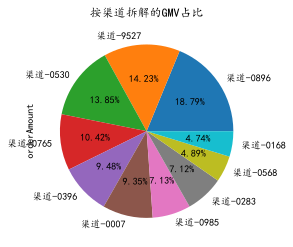

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

In [18]:
# 按渠道拆解GMV占比（饼图）

df.groupby('channelId')['orderAmount'].sum().nlargest(10).plot(kind='pie',autopct='%.2f%%')
plt.title('按渠道拆解的GMV占比')
# plt.ylabel()
plt.show()
plt.pie

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

gmv_ser = df.groupby('channelId')['orderAmount'].sum().nlargest(10)
data = [[gmv_ser.index[i],np.round(gmv_ser.values[i]/10000,2)] for i in range(gmv_ser.size)]

pie = Pie(init_opts=opts.InitOpts(width="800px", height="350px"))
pie.add(
        "",
        data
        ,
        radius=["40%", "75%"],
    )
pie.set_global_opts(
        title_opts=opts.TitleOpts(title="GMV贡献TOP-10渠道"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()


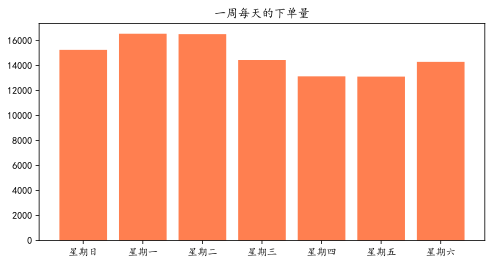

In [20]:
# 周一到周日哪天的下单量最高、每天哪个时段下单量最高（柱状图）

df['weekday'] = (df.orderTime.dt.weekday+1) % 7
temp = pd.pivot_table(df,index='weekday',values='orderID',aggfunc='nunique')
x = [f'星期{x}'for x in '日一二三四五六']

plt.figure(figsize=(8,4),dpi=120)
plt.bar(x,temp.orderID,color='coral')
plt.title('一周每天的下单量')
plt.show()

<Figure size 1200x480 with 0 Axes>

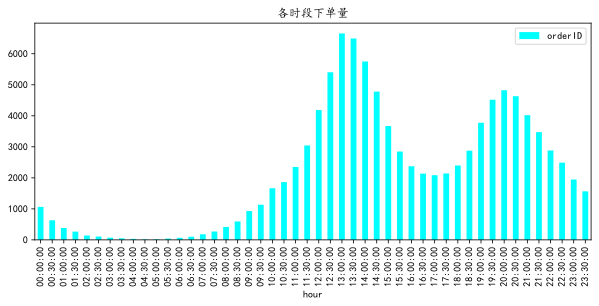

In [21]:
df['hour'] = df.orderTime.dt.floor('30T').dt.time  # 30分钟向下取整
temp = pd.pivot_table(df, index='hour',values='orderID',aggfunc='nunique')
plt.figure(figsize=(10,4),dpi=120)
temp.plot(figsize=(10,4),kind='bar',color='cyan')
plt.title('各时段下单量')
plt.show()

In [22]:
df = df[df.chargeback == '否']

In [23]:
# 用户复购率
temp = pd.pivot_table(df,index=['userID'],columns='month',values='orderID',aggfunc='nunique')

In [24]:
def handle_rebuy_data(x):
    if np.isnan(x):
        return x
    return 1 if x>1 else 0

temp = temp.applymap(handle_rebuy_data)
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
user-299989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [25]:

# 复购率
a = temp.sum() / temp.count()


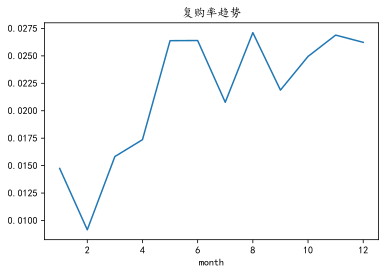

In [26]:
a.plot(kind='line')
plt.title('复购率趋势')
plt.show()

1. RFM模型

RFM模型是使用得较为广泛的客户关系管理分析模式。RFM模型是衡量客户价值和客户创利能力的重要工具和手段，通过一个客户的近期购买行为、购买的频率以及花钱的多少三项指标来描述该客户的价值状况。

在RFM模式中，R（Recency）表示客户最近一次购买的时间有多远，F（Frequency）表示客户在最近一段时间内购买的次数，M（Monetary）表示客户在最近一段时间内购买的金额。RFM模型强调以客户的行为来区分客户。利用RFM分析，我们可以做以下几件事情：

1. 建立会员金字塔，区分各个级别的会员，如高级会员、中级会员、低级会员，然后针对不同级别的会员施行不同的营销策略，制定不同的营销活动。
2. 发现流失及休眠会员，通过对流失及休眠会员的及时发现，采取营销活动，激活这些会员。
3. 在短信、EDM（Email Direct Marketing）促销中，可以利用模型，选取最优会员。
4. 维系老客户，提高会员的忠诚度。

在使用RFM模型时，可以给三个变量不同的权重或按一定的规则进行分组，然后组合三个变量，分出不同级别的会员。

In [27]:
# RFM模型
df['F'] =1

temp = pd.pivot_table(df,index='userID',
              values=['orderTime','payment','F'],
              aggfunc={
                  'orderTime': np.max,
                  'payment': np.sum,
                  'F': np.sum
              })

<ipython-input-27-ba2c4b8bfac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] =1


In [28]:
temp['R'] = (temp.orderTime-datetime(2019,12,31)).dt.days   # 最后一次购买日期离2019年最后一天相差多少天
temp['M'] = temp.payment

In [29]:
temp = temp[['R','F','M']]
temp

,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,1,443.55
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [30]:
temp = temp.apply(lambda x: x-x.mean())
temp = temp.applymap(lambda x: '1' if x>=0 else '0')

In [31]:
def make_tag(row):
    tags = {
        '111':'重要价值用户',
        '101':'重要发展客户',
        '011':'重要保持客户',
        '001':'重要挽留用户',
        '110':'一般价值用户',
        '100':'一般发展用户',
        '010':'一般保持用户',
        '000':'一般挽留用户'
    }
    r,f,m = row.values
    return tags.get(r+f+m)
    

temp['TAG'] = temp.apply(make_tag, axis=1)

In [32]:
temp

,R,F,M,TAG
userID,,,,
user-100000,1,0,1,重要发展客户
user-100003,0,0,0,一般挽留用户
user-100006,1,0,0,一般发展用户
user-100007,0,0,1,重要挽留用户
user-100008,1,0,1,重要发展客户
...,...,...,...,...
user-299980,1,0,0,一般发展用户
user-299983,1,0,0,一般发展用户
user-299989,1,1,1,重要价值用户


In [33]:
temp.groupby('TAG').TAG.count().sort_values()

TAG
一般保持用户     1427
重要保持客户     2631
一般价值用户     4039
重要发展客户     5655
重要挽留用户     7010
重要价值用户     7863
一般发展用户    19776
一般挽留用户    22204
Name: TAG, dtype: int64

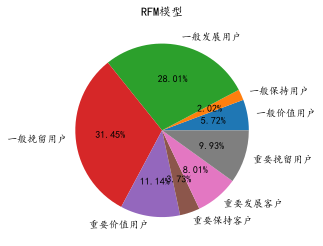

In [34]:
temp.groupby('TAG').TAG.count().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('')
plt.title('RFM模型')
plt.show()

### 数据分析报告撰写

1. Take away in 5 minutes　　五分钟看完
2. Never make your boss think　　不要让老板思考
3. Think complex, speak simple　　想复杂，说简单
4. One point in one page 　　 一页一观点